# Projeto 2 - MC886

## Alunos: 
&emsp;&emsp;&emsp;&emsp;Felipe Escórcio de Sousa - RA:171043\
&emsp;&emsp;&emsp;&emsp;Miguel Augusto S Guida&nbsp;&nbsp;&nbsp;- RA:174847

## Objetivo
&emsp;Este projeto tem como objetivo aplicar métodos de aprendizado para resolver tarefas de regressão e classificação. O projeto será dividido em duas partes:
<li>
    <ul>Parte 1: Tarefa de Regressão</ul>
    <ul>Parte 2: Tarefa de Classificação</ul>
</li>

## Parte 1 - Tarefa de Regressão
&emsp;Considerando que somos um robô goleiro em uma partida de futebol de robôs, recebemos o início de duas trajetórias de chutes diferentes, e vamos analisar se somos capazes de prever a trajetória completa da bola e também se conseguimos defender o chute.\
&emsp;\
&emsp;Esta tarefa consiste em implementar uma regressão linear e uma regressão polinomial, e analisar quais modelos são melhores em prever a trajetória dos chutes.



## Implementação Regressão Linear
&emsp;Implementamos o modelo de regressão linear definindo nossa função de hipótese $h_W$, calculando o custo com a função $MSE$ e implementando nossa própria versão de gradiente descendente.\
&emsp;Adotaremos como hipótese a coordenada $z$ da bola, e utilizaremos as coordenadas $x$ e $y$ como features para o treinamento do modelo de regressão. 

### Imports
&emsp;Utilizaremos as bibliotecas numpy para os cálculos necessários, e também a biblioteca matplotlib para plotar os gráficos 3D e o gráfico da função de cust.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

### Importação dos datasets

In [90]:
def import_dataset(filename):
    with open(filename) as binary_file:
        data = []
        x = []
        y = []
        z = []
        for d in binary_file:
            string = d.split()
            x.append(float(string[0]))
            y.append(float(string[1]))
            z.append(float(string[2]))
            
    array = np.ndarray(shape=(len(x), 3), dtype=float)

    for i in range(len(x)):
        array[i][0] = x[i]
        array[i][1] = y[i]
        array[i][2] = z[i]

    return array

### Modelo  $h_W$
&emsp;Para calcular nosso modelo de regressão (linear e polinomial), utilizamos um cálculo vetorial entre a matriz de pesos $W$ (sem o elemento $W_0$) e a matriz de features $X$ transposta. Somamos o resultado desta operação com o peso $W_0$ para obter o resultado final.\
&emsp;Nossa fórmula é definida da seguinte forma: $ h_W = (W \times X^T) + W_0$

In [91]:
def calc_h(W, X):
    m = X.shape[0]
    h = np.dot(W[0,1:],X.T).reshape((m, 1))+W[0,0]
    return h

### Função de custo
&emsp;Utilizamos a função de custo MSE para calcular o custo das nossas predições.\
&emsp;A fórmula utilizada foi: $ \dfrac{1}{2*m}*\sum_{\substack{0 < i < m \\}}(h_W^i - y^i)^2 $

In [92]:
def cost(h, Y):
    m = Y.shape[0]
    j = (1/(2*m))*np.sum((h-Y)**2)
    return j

### Função Gradiente Descendente
&emsp;Implementamos a função gradiente descendente "from scratch". Ela realiza uma iteração completa pela base de dados (Batch Gradient Descent).\
&emsp;A função recebe como parâmetros:
- **W**: Matriz linha com os pesos das features;
- **X**: Matriz de features com *m* exemplos;
- **Y**: Matriz de referência, com *m* exemplos;
- **m**: Número de exemplos;
- **n**: Número de features;
- **learning_rate**: Taxa de aprendizagem;

&emsp;Inicialmente, calculamos o valor de $h_W$ com oa parâmetros fornecidos, e utilizamos este dado para calcular a função de custo e atualizar os parâmetros.\
&emsp;Construímos o dicionário **grads** para guardar o gradiente de cada peso, e calculamos os gradientes através da fórmula: $$ \dfrac{1}{m}*\sum_{\substack{0 < i < m}}(h_W^i - y^i)*X^i $$
&emsp;Com os gradientes calculados, atualizamos os valores dos pesos com a fórmula:
$$ W_j = W_j - \alpha *dW_j $$


In [93]:
def gradient_desc(W,X,Y,m,n,learning_rate):
    h = calc_h(W,X)
    # print(h.shape)
    # print(h)
    j = cost(h, Y)
#     print("cost: ",j)

    grads = {}
    grads["dw0"] = (1/m)*np.sum((h-Y))
    for i in range(1,n+1):
        grads["dw"+str(i)] = (1/m)*np.sum((h-Y)*X[:,i-1])
    # print(grads)
    for i in range(0,n+1):
        W[0,i] = W[0,i] - learning_rate*grads["dw"+str(i)]
    # print(W)
    return W,j


### Função de Regressão Linear
&emsp;Função que recebe os parâmetros iniciais e organiza a lógica para a execução do modelo de regressão linear

In [94]:
def regressaoLinear(X, Y, iterations, learning_rate, W_scale = 0.05, kick='kick1'):
    print(X.shape)
    n = X.shape[1]
    m = X.shape[0]

    W = np.random.rand(1,n+1)*W_scale 
    print("Init W: ", W)           
    
    costs = []
    for it in range(0,iterations):
        W, j = gradient_desc(W,X,Y,m,n,learning_rate)
        costs.append(j)
    
    plotGrafico(W,X,Y,kick)
    plotCosts(iterations, costs)

### Função para plotar gráfico 3D e Gráfico de Custo
&emsp;Para plotar o gráfico da regressão linear e polinomial, analisamos as duas trajetórias de chute fornecidos, calculamos as posições das coordenadas $x$ e $y$ a partir da última posição da bola e atribuímos uma variação constante para estas coordenadas da seguinte forma:\
&emsp;&emsp;&emsp;$x' = -1.192 - i*0.05$   &emsp;&emsp;$  y' = 1.109 - i*0.05$ (chute 1)\
&emsp;&emsp;&emsp;$x' = -0.596 - i*0.03$   &emsp;&emsp;$  y' = 1.109 - i*0.05$ (chute 2)\
&emsp;Onde o $i$ representa a progressão dos frames do vídeo.\
&emsp;Dessa forma, utilizamos $x'$ e $y'$ para fazer a predição do valor da coordenada $z$ utilizando o modelo de regressão treinado.

In [95]:
def plotGrafico(W,X,Y,kick):
    h = calc_h(W, X)
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], Y[:]) 
    ax.scatter(X[:,0], X[:,1], h)

    i = 1
    if kick=='kick1':
        y = 1.109 - 0.050        
        predX1 = []
        predX2 = []
        predH = []
        while y > 0:
            y = 1.109 - i*0.050
            x = -1.192 - i*0.050
            h = calc_h(W,np.asarray([[x, y]]))
            predX1.append(x)
            predX2.append(y)
            predH.append(h)
            i+=1
    else:
        y = 1.109 - 0.050
        predX1 = []
        predX2 = []
        predH = []
        while y > 0:
            y = 1.109 - i*0.050
            x = -0.596 - i*0.030
            h = calc_h(W,np.asarray([[x, y]]))
            predX1.append(x)
            predX2.append(y)

            predH.append(h)
            i+=1

    ax.scatter(predX1[:], predX2[:], predH[:]) 
    plt.show()

def plotCosts(iterations, costs):
    fig = plt.figure()
    plt.plot(range(0,iterations),costs[:])
    print(costs[-1])
    plt.show()

## Implementação Regressão Polinomial
&emsp;Usaremos as mesmas funções de $h_W$, custo e gradiente utilizadas na regressão linear.\
&emsp;Também faremos a predição do valor da coordenada $z$ da bola, en função das coordenadas $x$ e $y$.

### Modelo Plotar Gráfico Polinomial
&emsp;Esta função segue a mesma lógica da função de plot da regressão linear.

In [96]:
def plotPolinomialRegression(W,X,Y,h,X_original,kick):
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_original[:,0], X_original[:,1], Y[:]) 
    ax.scatter(X_original[:,0], X_original[:,1], h) 

    i = 2
    if kick == 'kick2':
        y = 1.109 - 0.050
        x = -0.596 - 0.030
        z = 0.11  - 0.01
        predX1 = []
        predX2 = []
        predH = []
        while y > 0:
            y = 1.109 - i*0.050
            x = -0.596 - i*0.030
            x2 = x**2
            y2 = y **2
            h = calc_h(W,np.asarray([[x, y, y2]]))
            predX1.append(x)
            predX2.append(y)

            predH.append(h)
            i+=1
    else:
        y = 1.109 - 0.050
        x = -1.192 - 0.050        
        predX1 = []
        predX2 = []
        predH = []
        while y > 0:
            y = 1.109 - i*0.050
            x = -1.192 - i*0.050
            x2 = x**2
            y2 = y **2
            h = calc_h(W,np.asarray([[x, y, y2]]))
            predX1.append(x)
            predX2.append(y)
            predH.append(h)
            i+=1

    ax.scatter(predX1[:], predX2[:], predH[:]) 
    plt.show()


### Função para Regressão Polinomial

In [97]:
def regressaoPolinomial(X_original, Y, iterations, learning_rate, W_scale, kick='kick2'):
    print(X_original.shape)
    
    # X = np.array(X_original, copy=True)
    Y2 = X_original[:,1]**2
    X = np.hstack((X_original, Y2.reshape((X_original.shape[0],1))))
    
    n = X.shape[1]
    m = X.shape[0]
    W = np.random.rand(1,n+1)*W_scale 
    print("Init W: ", W)           
    
    costs = []

    for it in range(0,iterations):
        W, j = gradient_desc(W,X,Y,m,n,learning_rate)
        costs.append(j)
    
    h = calc_h(W, X)
    plotPolinomialRegression(W,X,Y,h,X_original,kick)
    plotCosts(iterations, costs)

### Chamada das funções de Regressão Linear e Polinomial

In [98]:
kick1 = import_dataset('kick1.dat')
kick2 = import_dataset('kick2.dat')

m1 = kick1.shape[0]
m2 = kick2.shape[0]

(20, 2)
Init W:  [[0.00353622 0.00114358 0.00470899]]


<IPython.core.display.Javascript object>


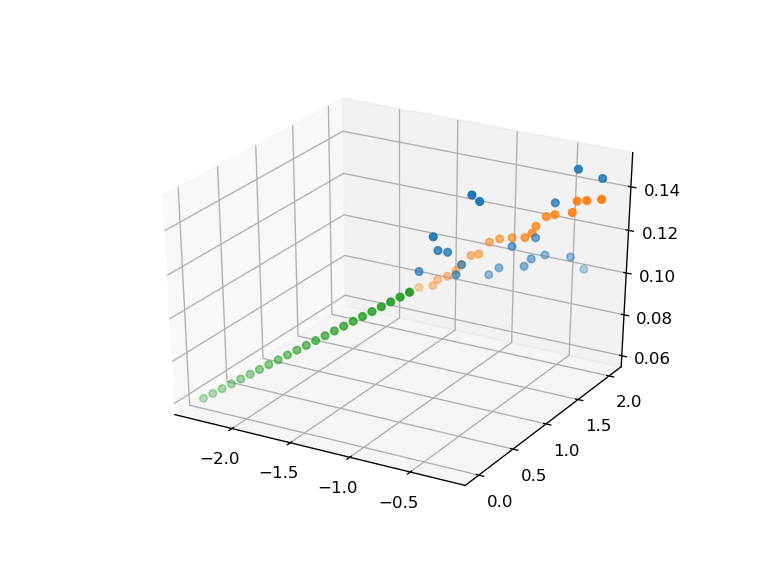

<IPython.core.display.Javascript object>


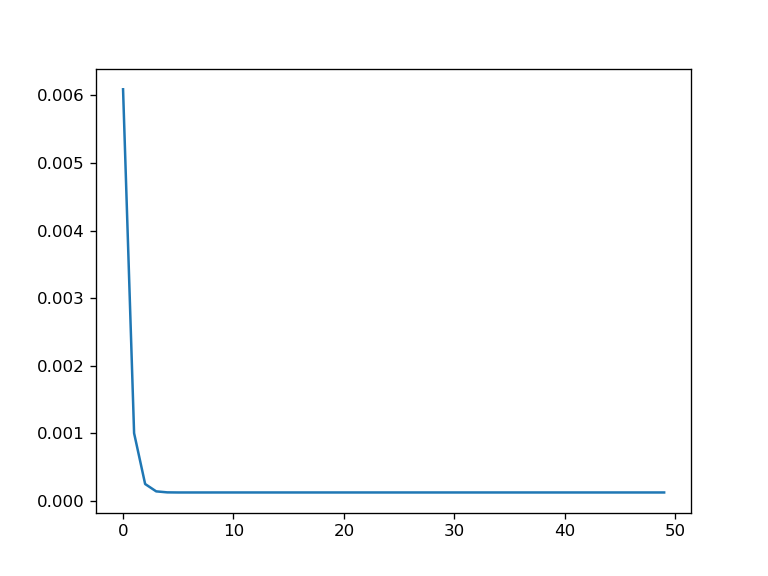

0.0001267464748836103


In [119]:
# Linear kick 1
learning_rate = 0.01
iterations = 50
W_scale = 0.01
regressaoLinear(kick1[:,:2], kick1[:,2].reshape(m1,1), iterations, learning_rate, W_scale)

(20, 2)
Init W:  [[0.00715476 0.00206017 0.00956652]]


<IPython.core.display.Javascript object>


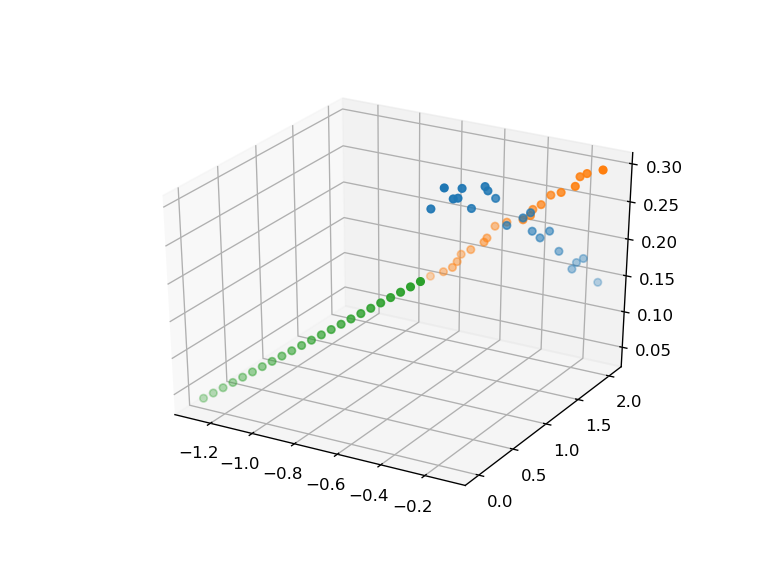

<IPython.core.display.Javascript object>


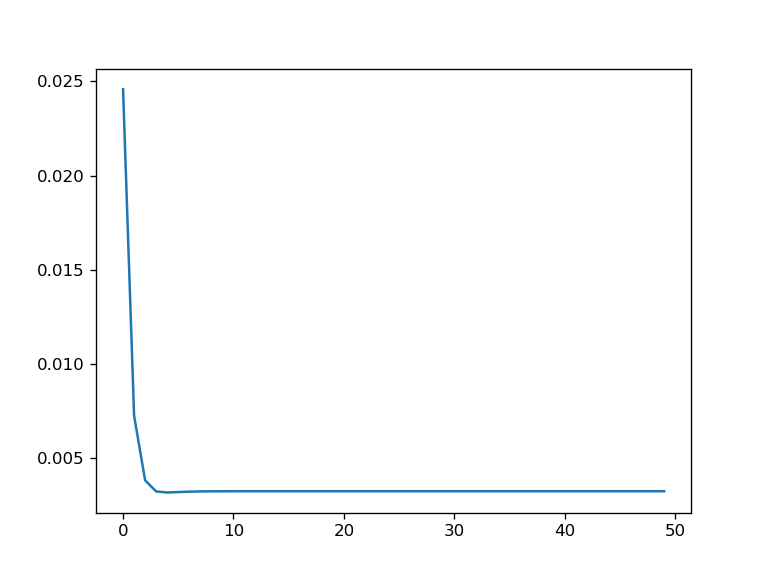

0.0032126408806285


In [120]:
# Linear kick 2
learning_rate = 0.01
iterations = 50
W_scale = 0.01
regressaoLinear(kick2[:,:2], kick2[:,2].reshape(m2,1), iterations, learning_rate, W_scale, 'kick2')

(20, 2)
Init W:  [[0.02623439 0.0278107  0.02215171 0.00132722]]


<IPython.core.display.Javascript object>


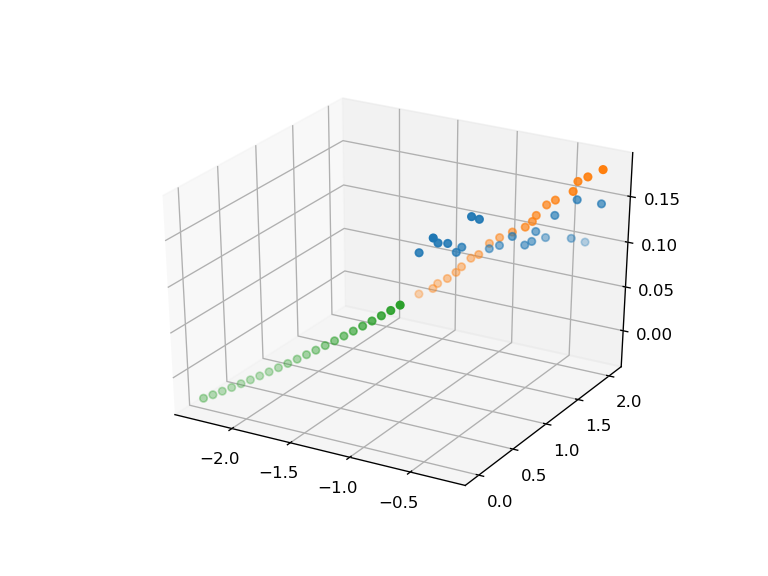

<IPython.core.display.Javascript object>


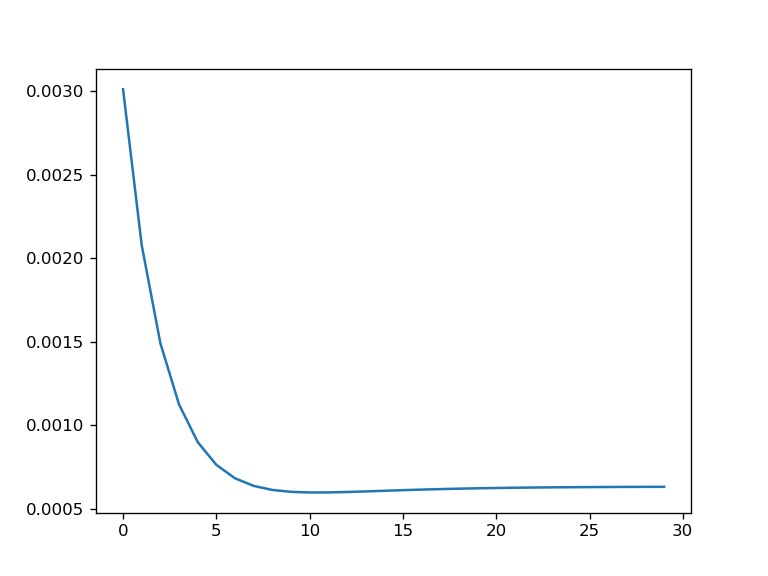

0.0006304282030282959


In [122]:
# Polinomial kick1

learning_rate_pol = 0.001
iterations_pol = 30
W_scale_pol=0.03
regressaoPolinomial(kick1[:,:2], kick1[:,2].reshape(m1,1), iterations_pol, learning_rate_pol, W_scale_pol, 'kick1')

(20, 2)
Init W:  [[0.65318536 0.30267437 0.51704248 0.41891404]]


<IPython.core.display.Javascript object>


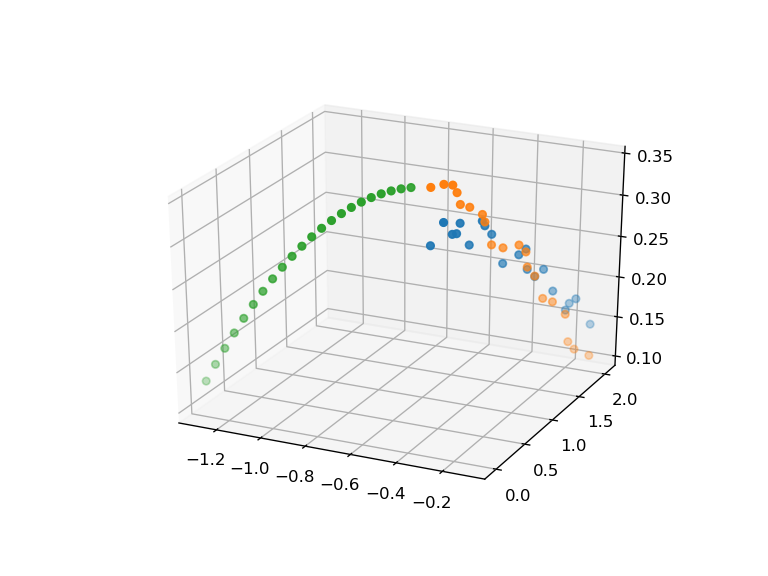

<IPython.core.display.Javascript object>


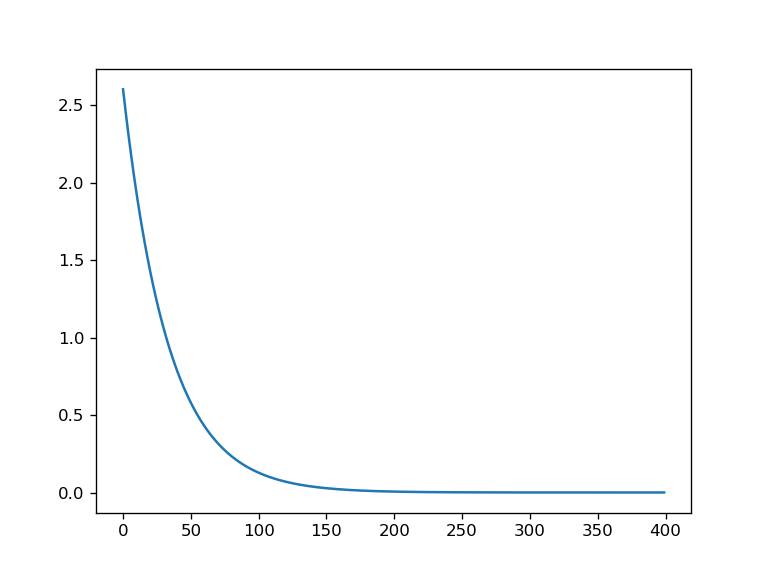

0.0006305674538498837


In [102]:
# Polinomial kick2

learning_rate_pol = 0.00008
iterations_pol = 400
W_scale_pol=0.825625
regressaoPolinomial(kick2[:,:2], kick2[:,2].reshape(m2,1), iterations_pol, learning_rate_pol, W_scale_pol)

## Análises

#### Avaliar o impacto da complexidade do modelo nos resultados (grau do modelo).

&emsp;Construimos um modelo de Complexidade linear e outro com complexidade polinomial de grau 2. Percebemos que nosso modelo linear se comportou bem no dataset 1, já que este apresenta uma distribuição linear dos dados. Porém, o modelo linear não entregou um bom resultado para o treinamento do dataset 2, já que este apresenta uma distribuição quadrática dos dados (parábola). \
&emsp;Nosso modelo polinomial de grau 2 entregou um resultado satisfatório para o dataset 1, porém se saiu melhor no treinamento com o dataset 2, conseguindo se localizar nos dados e descrever a trajetória da bola como uma parábola.\
&emsp;Percebemos que no chute 1, o modelo de regressão linear e polinomial entregaram resultados próximos, enquanto que no chute 2, os resultados foram bem diferentes.

#### Avaliar o impacto de valores diferentes para o learning rate durante o processo
- Modelo Linear:
    Encontramos que o valor ideal para a ataxa de aprendizado é em torno de 0.01. A partir de 0.1 o algoritmo de gradiente descendente estoura, e para valores em torno de 0.0005 o algoritmo demora para convergir, sendo necessário centenas de iterações.


- Modelo Polinomial:
    Encontramos valores diferentes para a taxa de aprendizado entre o treinamento dos dois datasets. Observamos que durante o treinamento do dataset 1, para valores em torno de 0.009 a função de custo fica "serrilhada", e o melhor valor para a taxa de aprendizado neste caso seria 0.001. \
    Durante o treinamento do dataset 2, observamos que para valores acima de 0.01, nosso algoritmo "explode", e para valores em torno de 0.009 o modelo gera uma parábola com a concavidade para cima, contrariando nossas expectativas. O melhor valor para a taxa de aprendizado seria 0.00008, pois de outra forma o modelo não é capaz de se encaixar bem nos dados.
    
#### Análise dos hiperparâmetros
&emsp;A taxa de aprendizado é um hiperparametro muito sensível, e pequenas alterações têm grandes reflexos no modelo, podendo levar a curva a extremos.\
&emsp;Utilizamos 3 hiperparametros (taxa de aprendizado, número de iterações e o fator de multiplicação dos pesos) para fazer nosso modelo convergir e minimizar nossa função de custo. Observa-se que muito rapidamente os custos atingem valores mínimos.\
&emsp;Quando a taxa de aprendizado é menor, são necessárias mais iterações para que os modelos convirjam. Também observou-se que mesmo tendo atingido valores mínimos, precisamos de mais iterações para atualizar os pesos, de forma que a curva predita represente melhor a curva dos dados.

#### O robô conseguirá defender o gol?
&emsp;Acreditamos que em alguns casos é possível que o robô consiga prever a trajetória da bola, porém os modelos de regressão são especializados nos tipos de trajetórias dos chutes. O robô conseguiria defender o gol de um chute rasteiro utilizando o modelo de regressão linear, e defender de um chute alto utilizando o modelo de regressão polinomial. Mas como os modelos possuem certa instabilidade, podendo prever valores negativos para $z$, é necessário desenvolver exceções para esses casos. 

<hr>


In [15]:
from sklearn.datasets import load_digits
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE 
from sklearn import tree
import graphviz 
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

%matplotlib notebook

## Parte 2 - Tarefa de Classificação
&emsp;Nesta segunda parte, o objetivo é resolver um problema de classificação utilizando dois métodos de aprendizado supervisionado diferentes. \
&emsp;A base de dados utilizada será a Pen-Based Recognition of Handwritten Digits Data Set, disponível na biblioteca sklearn.\
&emsp;Utilizaremos os modelos de aprendizado supervisionado disponíveis no sklearn na solução do problema de classificação, assim como outros modelos como o TSNE, cross validation e métricas de avaliação da biblioteca.



### Importando Dataset
&emsp;Aqui fazemos o import do dataset e separamos ele em treino e teste, na proporção 90/10.

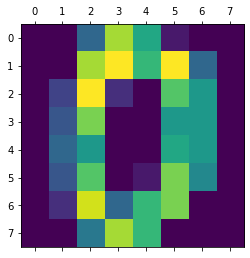

In [2]:
digits = load_digits()

plt.matshow(digits.images[0]) 
plt.show() 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.1, shuffle=False)

### Visualização dos dados com T-SNE
&emsp;Para a visualização dos nossos dados, escolhemos o modelo T-SNE, que reduz a dimensionalidade dos nossos dados (similar ao PCA) e possibilita a visualização através das duas componentes principais. Podemos observar que os dígitos presentes no dataset formam clusters bem distribuídos e que possui alguns ruídos, por exemplo quando um dígito se distancia de seu cluster e se aproxima de outro. Tembém que alguns clusters de dígitos (como o 0, 4 e 6) estão mais distantes dos clusteres, enquanto que clusteres como os dos dígitos 1, 3, 8 e 9 estão mais perto uns dos outros. Essa diferença na distribuição dos dígitos se dá pela semelhança ou distinção no formato deles.


<IPython.core.display.Javascript object>


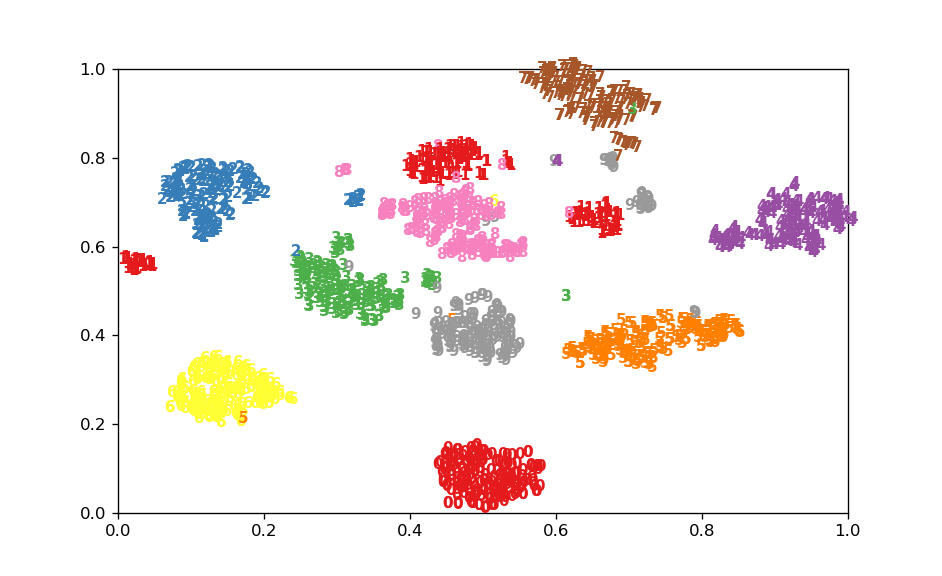

In [12]:
def plot_digits(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})


def plot_tsne(X, y):
    X_embedded = TSNE(n_components=2).fit_transform(X)
    plot_digits(X_embedded, y, "TSNE dos digitos")
    plt.show()
    
plot_tsne(digits.data, digits.target)

### Cross Validation
&emsp;Para nosso treino com cross validation, utilizamos a funcao "cross_validate" e escolhemos o modelo RepeatedKFold com 10 folds e 3 repetições. Utilizamos as métricas de acurácia, recall e f1_score para avaliar os resultados de cada iteração do cross validation. Para as métricas de recall e f1_score, escolhemos o cálculo de média "micro", pois avalia primeiro os acertos em cada classe individualmente e depois é calculado a média.\
&emsp;Assim obtemos os scores obtidos do treinamento com os dados de validação e conseguimos escolher o modelo que possui melhor pontuação no score gerado pelo modelo cross_validate.

In [5]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring_tuple = {'accuracy' : make_scorer(accuracy_score), 
                 'recall_score' : make_scorer(recall_score, average = 'micro'),
                 'f1_score' : make_scorer(f1_score, average = 'micro')}

### Matriz de Confusão

In [6]:
def plot_confusionMatrix(clf, X_test, y_test):
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")

    plt.show()

### Modelo de Regressão Logística
&emsp;O primeiro modelo de aprendizado supervisionado que escolhemos foi o modelo de regressão logística.  Utilizamos o modelo "LogisticRegression" disponível no sklearn.

Melhor Score:  1.0 Indice:  8
Test Score:  0.9333333333333333


<IPython.core.display.Javascript object>


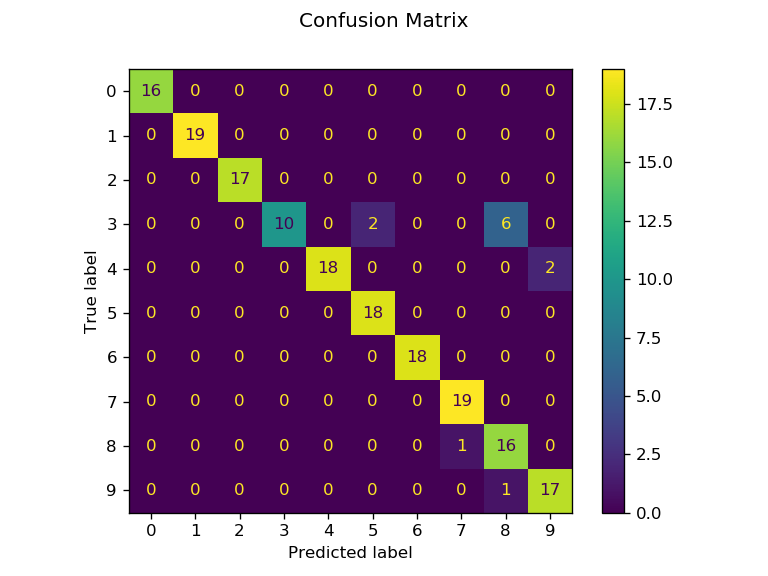

In [21]:
log_reg = LogisticRegression(max_iter=5000)

cv_results = cross_validate(log_reg, X_train, y_train,scoring=scoring_tuple, cv=cv, return_estimator=True)

print("Melhor Score: ", np.max(cv_results['test_accuracy']), "Indice: ",np.argmax(cv_results['test_accuracy']))

best_model_index = np.argmax(cv_results['test_accuracy']) # escolhendo indice do modelo com melhor score

best_log_reg = cv_results['estimator'][best_model_index] # escolhendo o modelo com melhor score

# Rodando com dados de teste
predict = best_log_reg.predict(X_test[:])
score = best_log_reg.score(X_test, y_test)
print("Test Score: ",score)
plot_confusionMatrix(best_log_reg, X_test, y_test)

### Modelo de Árvore de Descisão
&emsp;Para nosso segundo modelo, escolhemos o modelo de árvore de descisão utilizando o modelo "DecisionTreeClassifier" disponível no sklearn.\
&emsp;Observamos que os hiperparâmetros "criterion", "max_depth" e "min_impurity_decrease" foram os que apresentaram um resultado melhor no modelo. Utilizando o critério de entropia, o modelo conseguiu aprender melhor em cima dos dados, e fixando uma altura máxima para a árvore e um grau de impuridade também ajudou a controlar o tamanho da árvore de decisão.

Melhor Score:  0.9259259259259259 Indice:  4
Test Score:  0.8333333333333334


<IPython.core.display.Javascript object>


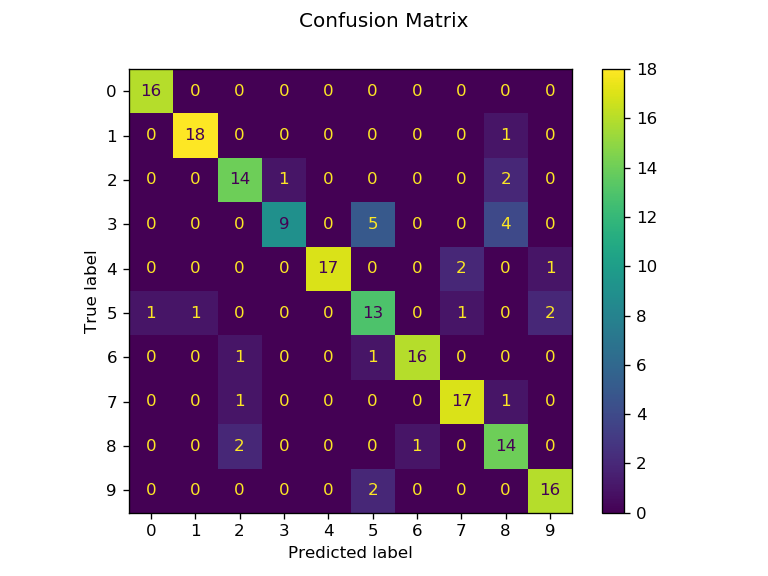

In [24]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_impurity_decrease=0.0002)

cv_results = cross_validate(tree_clf, X_train, y_train, scoring=scoring_tuple, cv=cv, return_estimator=True)

print("Melhor Score: ", np.max(cv_results['test_accuracy']), "Indice: ",np.argmax(cv_results['test_accuracy']))
best_model_index = np.argmax(cv_results['test_accuracy'])

best_tree_clf = cv_results['estimator'][best_model_index]

y_pred = best_tree_clf.predict(X_test[:])
score = best_tree_clf.score(X_test, y_test)
print("Test Score: ",score)


plot_confusionMatrix(best_tree_clf, X_test, y_test)

In [9]:
# Árvore de decisão em formato de texto
r = export_text(best_tree_clf)
print(r)

|--- feature_42 <= 7.50
|   |--- feature_26 <= 9.50
|   |   |--- feature_43 <= 2.50
|   |   |   |--- feature_30 <= 1.50
|   |   |   |   |--- feature_29 <= 13.50
|   |   |   |   |   |--- feature_19 <= 11.50
|   |   |   |   |   |   |--- feature_45 <= 4.50
|   |   |   |   |   |   |   |--- feature_12 <= 6.50
|   |   |   |   |   |   |   |   |--- feature_10 <= 12.50
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_10 >  12.50
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_12 >  6.50
|   |   |   |   |   |   |   |   |--- feature_30 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_30 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- feature_45 >  4.50
|   |   |   |   |   |   |   |--- feature_25 <= 9.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_25 >  9.00
|   |   |   |   | 

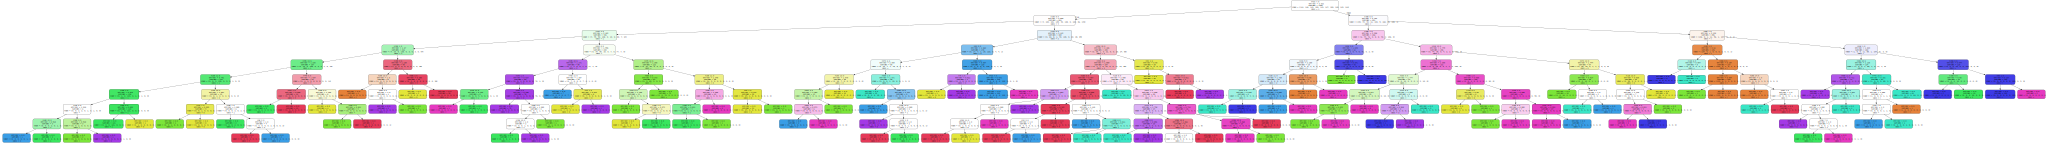

In [10]:
# Árvore de decisão em formato de gráfico
grafico_big = tree.export_graphviz(best_tree_clf, out_file=None, class_names=str(digits.target_names),  
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(grafico_big) 
graph

## Considerações Finais
- **Qualidade dos resultados**: Observamos que o modelo de regressão logística teve um desempenho melhor que o modelo de árvore de decisão, alcançando uma pontuação melhor tanto no treinamento com cross validation quanto no resultado final com o caso de teste. Esta diferença também é perceptível na matriz de confusão gerada pelos dois modelos, onde a regressão logística acerta mais as classes e a árvore de decisão tem um erro maior e mais espalhado pelas classes do problema.

- **Vantagens e desvantagens de cada método**:Percebemos que a regressão logística tem uma vantagem para escolher as features que são mais importantes para cada classe, pois ela tem uma modelagem mais flexível que a solução proposta pela árvore de decisão. Também percebemos que o treinamento da regressão logística é mais custoso que o treinamento da árvore de decisão, levando muito mais tempo para a execução do modelo.  

### Divisão das Tarefas
&emsp;Dividimos as tarefas igualmente entre os participantes do grupo, realizando em conjunto as atividades de desenvolvimento, análise e discussão de resultados, assim como a escrita do relatório.